In [ ]:
from google.colab import files
import io 
uploaded =files.upload()


Saving train.csv to train (1).csv


In [ ]:
import pandas as pd 

In [ ]:
df =pd.read_csv('train.csv')

In [ ]:
df

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,ID58589,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58589,ID58590,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58590,ID58591,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [ ]:
df.shape

(58592, 44)

In [ ]:
df=df.loc[0:,['policy_id','age_of_car','population_density']]
#faire la regression lineaire , c'est a dire montrer qu'il y'a une relation entre l'age d'une voiture et la population qui conduit cette derniere

In [ ]:
df

,policy_id,age_of_car,population_density
0,ID00001,0.05,4990
1,ID00002,0.02,27003
2,ID00003,0.02,4076
3,ID00004,0.11,21622
4,ID00005,0.11,34738
...,...,...,...
58587,ID58588,0.13,8794
58588,ID58589,0.02,7788
58589,ID58590,0.05,34738
58590,ID58591,0.14,8794


In [ ]:
df['age_of_car'].describe()

count    58592.000000
mean         0.069424
std          0.056721
min          0.000000
25%          0.020000
50%          0.060000
75%          0.110000
max          1.000000
Name: age_of_car, dtype: float64

Regression lineaire

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
# Divisez nos données en un ensemble d'entraînement et un ensemble de test
X_train, X_test, y_train, y_test = train_test_split(df['age_of_car'], df['population_density'], test_size=0.2, random_state=42)



In [ ]:
# Créez un objet de régression linéaire
model= LinearRegression()

In [ ]:
# Entraînez votre modèle
model.fit(X_train.values.reshape(-1, 1), y_train)


LinearRegression()

In [ ]:
# Faites des prédictions sur l'ensemble de test
y_pred = model.predict(X_test.values.reshape(-1, 1))

In [ ]:
# Évaluez les performances de votre modèle

erreur_quadritique_moyenne=metrics.mean_squared_error(y_pred,y_test)
erreur_q=np.sqrt(erreur_quadritique_moyenne)

Dans notre cas, l'EQM est de 148706698.51696798, ce qui est assez élevé en soi. Cependant, il est important de noter que l'interprétation de l'EQM dépend du contexte et de nos données.

l'Erreur Q est de 12194.53560070936, ce qui est relativement faible. Cela suggère que le modèle parvient à prédire les valeurs réelles avec une certaine précision.

In [ ]:
print("l'erreur quadritique moyenne :", erreur_quadritique_moyenne)
print("l'Erreur q :", erreur_q)

l'erreur quadritique moyenne : 310366497.525434
l'Erreur q : 17617.22161765112


In [ ]:
#model=LinearRegression()

Visualisation

In [ ]:
import matplotlib.pyplot as plt

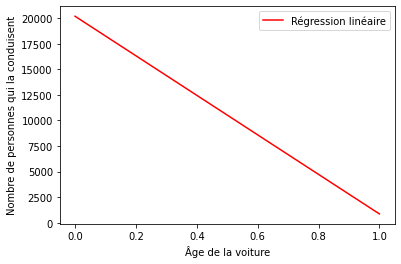

In [ ]:
# Tracez la droite de régression linéaire prédite par le modèle
x = np.linspace(0, np.max(df['age_of_car']), 100)
y = model.coef_[0] * x + model.intercept_
plt.plot(x, y, color='r', label="Régression linéaire")

plt.xlabel("Âge de la voiture")
plt.ylabel("Nombre de personnes qui la conduisent")
plt.legend()
plt.show()

L'on constante bien que l'age de la voiture influe sur le nombre de personne utilisant celle ci .

Arbre decision 

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import joblib

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
df =pd.read_csv('train.csv')

In [ ]:
df

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,ID58589,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58589,ID58590,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58590,ID58591,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [ ]:
df=df[['age_of_policyholder','age_of_car','is_claim']]
#df=df[['age_of_policyholder','age_of_car','is_claim']].head(19)

In [ ]:
df

,age_of_policyholder,age_of_car,is_claim
0,0.644231,0.05,0
1,0.375000,0.02,0
2,0.384615,0.02,0
3,0.432692,0.11,0
4,0.634615,0.11,0
...,...,...,...
58587,0.644231,0.13,0
58588,0.519231,0.02,0
58589,0.451923,0.05,0
58590,0.557692,0.14,0


In [ ]:
df['age_of_policyholder']

0        0.644231
1        0.375000
2        0.384615
3        0.432692
4        0.634615
           ...   
58587    0.644231
58588    0.519231
58589    0.451923
58590    0.557692
58591    0.442308
Name: age_of_policyholder, Length: 58592, dtype: float64

In [ ]:
# Sélectionner les colonnes qui nous intéressent
X = df[['age_of_policyholder', 'age_of_car']]
y = df['is_claim']


In [ ]:
# Diviser les données en un ensemble d'apprentissage et un ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialiser l'arbre de décision et l'entraîner sur l'ensemble d'apprentissage
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Prédire la variable cible sur l'ensemble de test
predictions = model.predict(X_test)

Dans notre cas, le score de 0.93 suggère que le modèle est assez précis dans la classification des données d'évaluation. Cela signifie que le modèle a correctement identifié la plupart des exemples à prédire.

In [ ]:
# Évaluer la performance de l'arbre de décision en utilisant l'accuracy score
score = accuracy_score(y_test, predictions)
print("score: ", score)

score:  0.9346360610973633


In [ ]:
import joblib

df= pd.read_csv("train.csv")
df=df.head(19)
X = df[['age_of_policyholder', 'age_of_car']]
y = df['is_claim']
model = DecisionTreeClassifier()

model.fit(X, y)

#ici nous sauvegardons notre modèle
joblib.dump(model, 'mon-model-prediction-assure')

['mon-model-prediction-assure']

In [ ]:
model = joblib.load('mon-model-prediction-assure')
#predictions = model.predict([ [0.5,0.02] ]) #Pas de reclamation
predictions = model.predict([ [0.480769,0.03] ])#Reclamation


predictions

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

Visualisation

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
# Exporter l'arbre de décision sous forme d'un fichier DOT
dot_data = export_graphviz(model, out_file=None, 
                           feature_names=X.columns,  
                           class_names=['no_claim', 'claim'],  
                           filled=True, rounded=True,  
                           special_characters=True)



In [ ]:
# Convertir le fichier DOT en un objet graphique Graphviz
graph = graphviz.Source(dot_data,format='png')

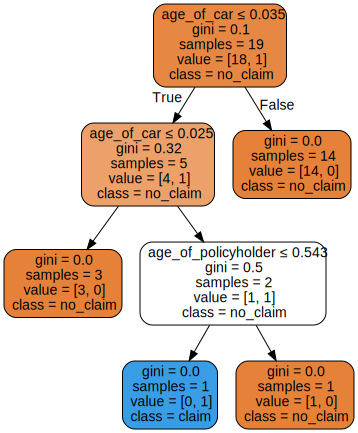

In [ ]:
graph

In [ ]:
# Afficher l'arbre de décision
graph.render("arbre_de_decision")

'arbre_de_decision.png'

# ***Random*** ***Forest***

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
# Charger les données
df_train = pd.read_csv("train.csv")
df_train.dropna(axis=0, inplace=True)
df_train =df_train[['policy_tenure','age_of_car','population_density','make','airbags','displacement','cylinder','gear_box','is_claim']]


df_train

,policy_tenure,age_of_car,population_density,make,airbags,displacement,cylinder,gear_box,is_claim
0,0.515874,0.05,4990,1,2,796,3,5,0
1,0.672619,0.02,27003,1,2,796,3,5,0
2,0.841110,0.02,4076,1,2,796,3,5,0
3,0.900277,0.11,21622,1,2,1197,4,5,0
4,0.596403,0.11,34738,2,2,999,3,5,0
...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,8794,2,2,999,3,5,0
58588,1.199642,0.02,7788,1,2,796,3,5,0
58589,1.162273,0.05,34738,1,2,796,3,5,0
58590,1.236307,0.14,8794,1,2,1197,4,5,0


In [ ]:
X = df_train.drop('is_claim', axis=1) # On enlève la variable cible
y = df_train['is_claim'] # On définit la variable cible

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc


RandomForestClassifier(random_state=42)

In [ ]:
# Entraîner l'algorithme de Random Forest sur les données d'entraînement
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rfc.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

print('score:', accuracy_score(y_test, y_pred))

score: 0.9144978240464203


In [ ]:
# Calculer l'aire sous la courbe ROC
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC score:", roc_auc)


ROC AUC score: 0.5054061714077221


In [ ]:
# Calculer les valeurs de la courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)

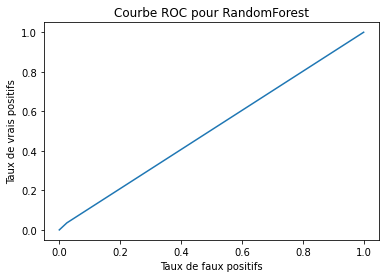

In [ ]:
# Afficher la courbe ROC
plt.plot(fpr, tpr)
plt.title('Courbe ROC pour RandomForest')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.show()

# ***ADABOOST***

In [ ]:
# Importer les bibliothèques nécessaires
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Charger les données
df_train = pd.read_csv("train.csv")
df_train.dropna(axis=0, inplace=True)
df_train =df_train[['policy_tenure','age_of_car','population_density','make','airbags','displacement','cylinder','gear_box','is_claim']]


df_train

,policy_tenure,age_of_car,population_density,make,airbags,displacement,cylinder,gear_box,is_claim
0,0.515874,0.05,4990,1,2,796,3,5,0
1,0.672619,0.02,27003,1,2,796,3,5,0
2,0.841110,0.02,4076,1,2,796,3,5,0
3,0.900277,0.11,21622,1,2,1197,4,5,0
4,0.596403,0.11,34738,2,2,999,3,5,0
...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,8794,2,2,999,3,5,0
58588,1.199642,0.02,7788,1,2,796,3,5,0
58589,1.162273,0.05,34738,1,2,796,3,5,0
58590,1.236307,0.14,8794,1,2,1197,4,5,0


In [ ]:
# Sélectionner les caractéristiques et la variable cible
features = df_train.drop('is_claim', axis=1)
target = df_train['is_claim']

In [ ]:
# Diviser les données en ensemble de formation et de test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
X_train


,policy_tenure,age_of_car,population_density,make,airbags,displacement,cylinder,gear_box
47804,1.010772,0.11,34791,1,2,1197,4,5
55075,0.473653,0.05,4076,1,2,796,3,5
45912,0.287461,0.06,27742,1,2,796,3,5
29180,0.547799,0.08,27003,1,2,1197,4,5
41933,1.140288,0.08,17804,3,6,1493,4,6
...,...,...,...,...,...,...,...,...
54343,1.230162,0.19,8794,3,6,1493,4,6
38158,0.445617,0.00,4076,1,2,796,3,5
860,1.190469,0.13,8794,1,2,1197,4,5
15795,0.023212,0.00,34738,1,2,796,3,5


In [ ]:
# Instancier le classificateur AdaBoost
abc = AdaBoostClassifier(n_estimators=100, random_state=42)



In [ ]:
# Entraîner l'algorithme AdaBoost sur les données d'entraînement
abc = abc.fit(X_train, y_train)


In [ ]:
# Prédire les classes de l'ensemble de test
y_pred = abc.predict(X_test)

In [ ]:
# Calculer l'exactitude du modèle
accuracy = accuracy_score(y_test, y_pred)
print("score:", accuracy)

score: 0.9354893762266405


In [ ]:
# Calculer l'aire sous la courbe ROC
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC score:", roc_auc)

ROC AUC score: 0.5


In [ ]:
# Calculer les valeurs de la courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)

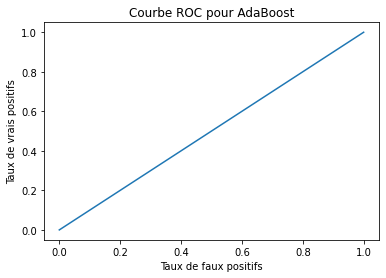

In [ ]:
# Afficher la courbe ROC
plt.plot(fpr, tpr)
plt.title('Courbe ROC pour AdaBoost')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.show()